### 1 - Importing The Libraries

In [2]:
import os
import cv2
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.regnet import RegNetX002
from tensorflow.keras.applications.efficientnet import EfficientNetB0
import matplotlib.pyplot as plt

### 2 - Importing The Datasets

In [3]:
print("Dataset is creating...")

from google.colab import drive
drive.mount('/content/drive')

#The path of the datasets
data_dir = '/content/drive/MyDrive/Education/MSc/GTSRB'
train_path = '/content/drive/MyDrive/Education/MSc/GTSRB/Train'
test_path = '/content/drive/MyDrive/Education/MSc/GTSRB/Test/'

folders = os.listdir(train_path)
samples_dict = {}

for folder in folders:
    images_in_folder = os.listdir(train_path + '/' + folder)
    samples_dict[folder] = len(images_in_folder)

image_data = []
image_labels = []
print("Done!")

Dataset is creating...
Mounted at /content/drive
Done!


### 3 - Converting The Images to 32x32 Size

In [4]:
print("Images are converting...")
class_num = len(os.listdir(train_path))
for i in range(class_num):
    path = train_path +'/'+ str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((32, 32))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)
print("Done!")

Images are converting...
Done!


### 4 - Creating The Array of The Data and Labels

In [5]:
print("The Array of The Data and Labels are creating...")
image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)
print("Done!")

The Array of The Data and Labels are creating...
(17441, 32, 32, 3) (17441,)
Done!


### 5 - Preparing The Dataset

In [6]:
print("The Dataset is Preparing...")
#The dataset is split into training data and test data.
x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

print("Training and test dataset information (# of images, image dimensions): ")
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

#Dataset normalization
x_train = x_train/255.0
x_test = x_test/255.0

#Dataset One-Hot Encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print("Done!")

The Dataset is Preparing...
Training and test dataset information (# of images, image dimensions): 
x_train : (13952, 32, 32, 3)
y_train : (13952,)
x_test : (3489, 32, 32, 3)
y_test : (3489,)
Done!


### 6 - Defining The Number of Epochs

In [7]:
epoch_number=10

### 7 - Run The Corresponding Cell to Run Related Neural Networks.

#### a) KolNet Model

In [8]:
print("The Model is Creating...")
#Create a Neural Network Model
model = Sequential()

#Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dense Layer
model.add(Flatten())#Conversion of inputs into a single vector
model.add(Dense(64, activation='relu'))

#Output Layer
model.add(Dense(class_num, activation='softmax'))

#Compiling The Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training
history=model.fit(x_train, y_train, epochs=epoch_number, validation_data=(x_test, y_test), batch_size=64)

#Measuring The Accuracy of The Model With The Test Data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Done!")

The Model is Creating...
Epoch 1/10
218/218 [==============================] - 18s 80ms/step - loss: 2.4840 - accuracy: 0.3114 - val_loss: 1.4243 - val_accuracy: 0.5598
Epoch 2/10
218/218 [==============================] - 17s 78ms/step - loss: 0.8358 - accuracy: 0.7613 - val_loss: 0.4987 - val_accuracy: 0.8670
Epoch 3/10
218/218 [==============================] - 17s 78ms/step - loss: 0.3574 - accuracy: 0.9029 - val_loss: 0.2406 - val_accuracy: 0.9349
Epoch 4/10
218/218 [==============================] - 17s 79ms/step - loss: 0.2037 - accuracy: 0.9475 - val_loss: 0.1838 - val_accuracy: 0.9536
Epoch 5/10
218/218 [==============================] - 17s 78ms/step - loss: 0.1227 - accuracy: 0.9706 - val_loss: 0.1242 - val_accuracy: 0.9713
Epoch 6/10
218/218 [==============================] - 17s 78ms/step - loss: 0.0872 - accuracy: 0.9794 - val_loss: 0.1089 - val_accuracy: 0.9705
Epoch 7/10
218/218 [==============================] - 17s 78ms/step - loss: 0.0711 - accuracy: 0.9820 - val_los

#### b) EfficientNet Model

In [ ]:
model = EfficientNetB0(weights=None, input_shape=(32, 32, 3), classes=43)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=epoch_number, validation_data=(x_test, y_test))

Epoch 1/10
218/218 [==============================] - 165s 631ms/step - loss: 3.3281 - accuracy: 0.2048 - val_loss: 3.1880 - val_accuracy: 0.0651
Epoch 2/10
218/218 [==============================] - 136s 625ms/step - loss: 1.9958 - accuracy: 0.4536 - val_loss: 3.1216 - val_accuracy: 0.1542
Epoch 3/10
218/218 [==============================] - 136s 625ms/step - loss: 1.2687 - accuracy: 0.6436 - val_loss: 1.9487 - val_accuracy: 0.3895
Epoch 4/10
218/218 [==============================] - 139s 637ms/step - loss: 0.8882 - accuracy: 0.7521 - val_loss: 0.6915 - val_accuracy: 0.7868
Epoch 5/10
218/218 [==============================] - 137s 627ms/step - loss: 0.5743 - accuracy: 0.8280 - val_loss: 0.4958 - val_accuracy: 0.8404
Epoch 6/10
218/218 [==============================] - 132s 603ms/step - loss: 0.4397 - accuracy: 0.8769 - val_loss: 0.5922 - val_accuracy: 0.8209
Epoch 7/10
218/218 [==============================] - 137s 627ms/step - loss: 0.3058 - accuracy: 0.9094 - val_loss: 0.2902 -

#### c) ResNet Model

In [ ]:
model = ResNet50(weights=None, input_shape=(32, 32, 3), classes=43)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=epoch_number, validation_data=(x_test, y_test))

Epoch 1/10
218/218 [==============================] - 1079s 5s/step - loss: 2.2902 - accuracy: 0.3796 - val_loss: 3.5454 - val_accuracy: 0.1677
Epoch 2/10
218/218 [==============================] - 1041s 5s/step - loss: 0.7119 - accuracy: 0.7986 - val_loss: 2.3891 - val_accuracy: 0.5096
Epoch 3/10
218/218 [==============================] - 1044s 5s/step - loss: 0.2963 - accuracy: 0.9142 - val_loss: 0.3440 - val_accuracy: 0.8985
Epoch 4/10
218/218 [==============================] - 1037s 5s/step - loss: 0.4911 - accuracy: 0.8725 - val_loss: 0.4314 - val_accuracy: 0.8687
Epoch 5/10
218/218 [==============================] - 1021s 5s/step - loss: 0.1912 - accuracy: 0.9512 - val_loss: 14.8984 - val_accuracy: 0.2330
Epoch 6/10
218/218 [==============================] - 1014s 5s/step - loss: 0.4041 - accuracy: 0.8902 - val_loss: 1.4258 - val_accuracy: 0.6933
Epoch 7/10
218/218 [==============================] - 1048s 5s/step - loss: 0.1998 - accuracy: 0.9596 - val_loss: 0.1023 - val_accuracy

### 8 - Accuracy of The Model and Saving the Model

In [9]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = np.sum(predictions==y_true)/len(y_true)
print("Accuracy:", accuracy)

file_name = input("Enter the name of the data to save: ")
model.save(file_name + '.h5')

110/110 [==============================] - 1s 10ms/step
Accuracy: 0.9882487818859272


KeyboardInterrupt: ignored

### 9 - Visualizing the result

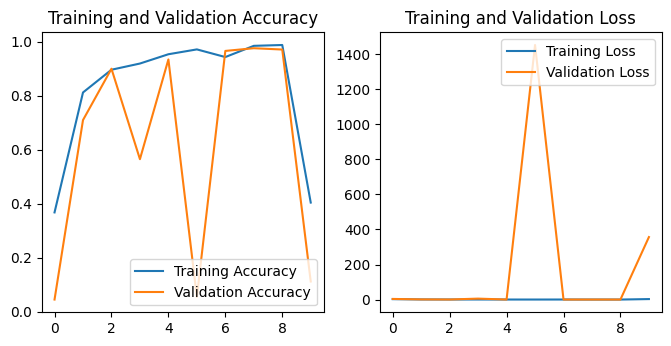

In [ ]:
epochs_range = range(epoch_number)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()